# Setup

In [42]:
import numpy as np
import seaborn as sns

from my_units import *      # where natural units are defined

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcdefaults()
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
rcParams['mathtext.rm'] = 'Times New Roman' 
rcParams['text.usetex'] = True
rcParams['font.family'] = 'times' #'sans-serif'
font_manager.findfont('serif', rebuild_if_missing=True)
fontsize = 14
rcParams.update({'font.size':fontsize})

# Import and plot axion signal-galaxy cross-correlation

In [45]:
# Data files with the axion-induced cross-correlation C_\ell^{Tg} for 65 axion masses, separately for the unwise Blue and Green samples.
# Each C_\ell^{Tg} has 6001 elements for \ell between 0 and 6001
# The C_\ell^{Tg} are in units of eV^2, so the actual C_\ell^{Tg} can be obtained by multiplying by the photon-axion coupling in units of eV squared, i.e. (1e-20)**2 * C_\ell^{Tg}, for g_a = 10^{-11} GeV^-1
# The reference frequency used is 353 GHz

Tg_blue  = np.load('data/axion_Tg/data_axion_Tg_battagliaAGN_blue_HOD21.npy',  allow_pickle=True)
Tg_green = np.load('data/axion_Tg/data_axion_Tg_battagliaAGN_green_HOD21.npy', allow_pickle=True)
Tg_blue.shape, Tg_green.shape  

((65, 6001), (65, 6001))

In [52]:
# List of corresponding 65 axion masses
ma_list = np.asarray([1.4e-13, 1.5e-13, 1.6e-13, 1.7e-13, 1.9e-13, \
                      2.0e-13, 2.2e-13, 2.4e-13, 2.6e-13, 2.8e-13, \
                      3.0e-13, 3.2e-13, 3.4e-13, 3.6e-13, 3.8e-13, \
                      4.0e-13, 4.2e-13, 4.4e-13, 4.6e-13, 4.8e-13, \
                      5.0e-13, 5.2e-13, 5.4e-13, 5.6e-13, 5.8e-13, \
                      6.0e-13, 6.2e-13, 6.4e-13, 6.6e-13, 6.8e-13, \
                      7.0e-13, 7.4e-13, 7.8e-13, 8.0e-13, 8.4e-13, 8.8e-13, \
                      9.0e-13, 9.4e-13, 9.8e-13, 1.0e-12, 1.4e-12, 1.8e-12, \
                      2.0e-12, 2.3e-12, 2.7e-12, 3.0e-12, 3.3e-12, 3.7e-12, \
                      4.0e-12, 4.3e-12, 4.7e-12, 5.0e-12, 5.3e-12, 5.7e-12, \
                      6.0e-12, 6.5e-12, 7.0e-12, 7.5e-12, 8.0e-12, 8.5e-12, 9.0e-12, 9.5e-12, 1.0e-11, 1.5e-11, 2.0e-11]);
ma_list.shape

(65,)

In [57]:
kB      = 8.61732814974493*1e-5   # Boltzmann constant in eV/Kelvin
TFIRAS   = 2.726     # in Kelvin

ghztoev    = lambda GHz: 4.13566553853809E-06 * GHz
xx  = lambda om: om / (kB * TFIRAS)      # for omega in eV
xov = lambda om: (1. - np.exp(-xx(om))) / xx(om)

units_353 = xov(ghztoev(353)) * ghztoev(353)
units_145 = xov(ghztoev(145)) * ghztoev(145)

# To convert the Cell at a different reference frequency, i.e. at 145 GHz, divide by units_353 and multiply by units_145

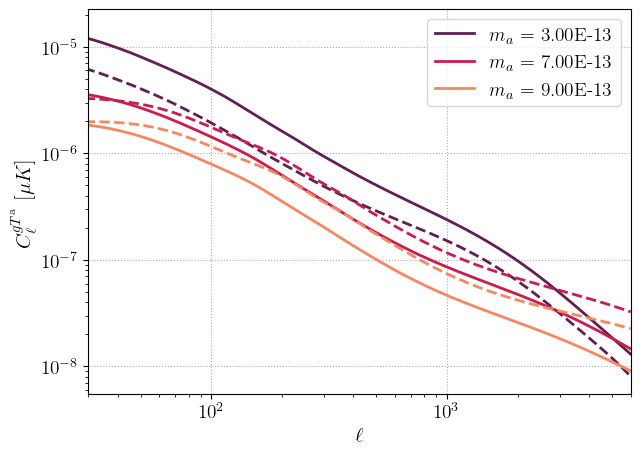

In [59]:
# Reproducing Fig. 5 of 2405.08059

ma_i = [10, 30, 36]
ell_list = np.arange(6001)
ga = 1.E-20
color_list = sns.color_palette("rocket", len(ma_i))

# Plots of the B field profiles as a function of halo mass and redshift (just for checking)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

for i, i_m in enumerate(ma_i):
    ax.plot(ell_list, ga**2 * Tg_blue[i_m]/units*units_145, linewidth=2, ls='-', color=color_list[i], label='$m_a$ = '+"{:.2E}".format(ma_list[i_m]))
    ax.plot(ell_list, ga**2 * Tg_green[i_m]/units*units_145, linewidth=2, ls='--', color=color_list[i])

ax.set_xlim(30, 6000)
ax.set_xscale('log'); ax.set_yscale('log')
ax.grid(ls=':', color='darkgray', alpha=1)
ax.set_xlabel(r'$\ell$', fontsize=15); ax.set_ylabel(r'$C^{g T^{\rm a}}_{\ell}\ [\mu K ]$', fontsize=15);
ax.legend();